<a href="https://colab.research.google.com/github/ralhanak/Crop-yield-Prediction/blob/main/Crop_Prydiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install pyshp
import geopandas as gpd

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 69.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.4 MB/s eta 0:00:00
Mounted at /content/drive


<ipython-input-3-140321f7b56b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend1['Value'] = trend1['Value'].str.replace(',', '').astype(float)
<ipython-input-3-140321f7b56b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend2['Value'] = trend2['Value'].str.replace(',', '').astype(float)


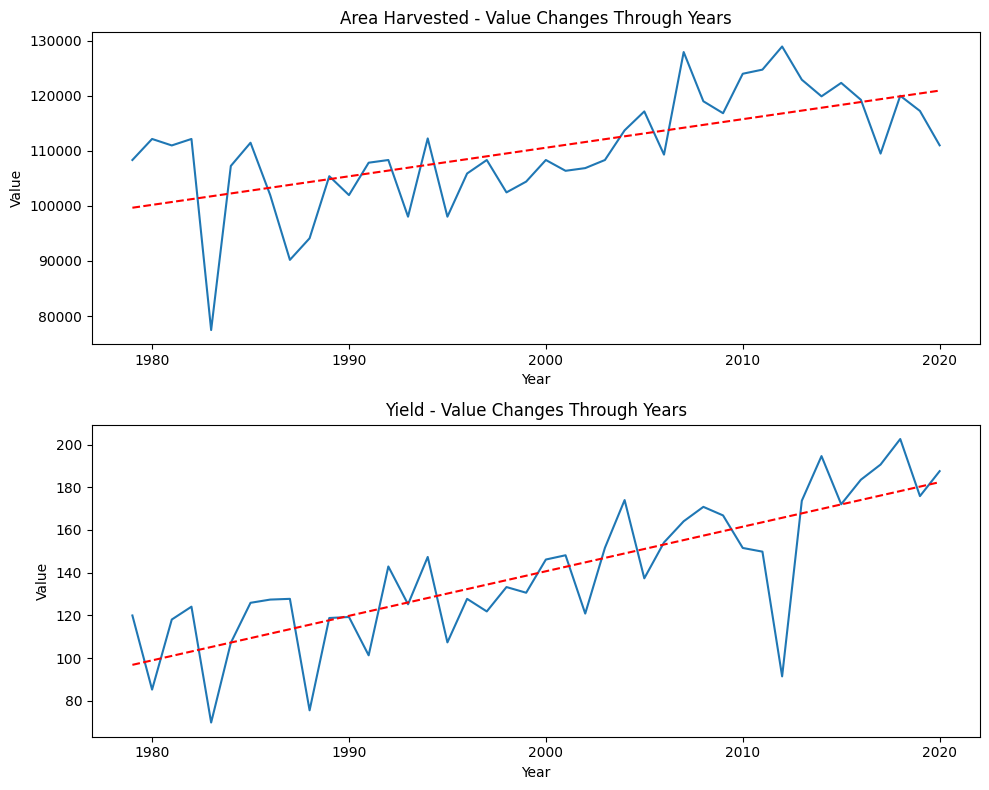

In [ ]:
# Show the averaged tendency from the previous years of Illinois state

file_path = '/content/drive/MyDrive/DATA/MAIZE/IL.csv'
data = pd.read_csv(file_path)
data = data[['location_desc', 'year', 'Value', 'domain_desc', 'source_desc', 'prodn_practice_desc', 'statisticcat_desc']]
data = data[
    (data['domain_desc'] == 'TOTAL') &
    (data['source_desc'] == 'SURVEY') &
    (data['prodn_practice_desc'] == 'ALL PRODUCTION PRACTICES')
    ]
trend1 = data[data['statisticcat_desc'] == 'AREA HARVESTED']
trend2 = data[data['statisticcat_desc'] == 'YIELD']
# get the mean of area harvested and yield for all counties in Illinois state
trend1['Value'] = trend1['Value'].str.replace(',', '').astype(float)
trend2['Value'] = trend2['Value'].str.replace(',', '').astype(float)
grouped_trend1 = trend1.groupby('year')['Value'].mean()
grouped_trend2 = trend2.groupby('year')['Value'].mean()

# Plot the value of area harvested and yield changes through previous years
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(grouped_trend1)
ax1.set_title('Area Harvested - Value Changes Through Years')
ax1.set_xlabel('Year')
ax1.set_ylabel('Value')
x = np.array(grouped_trend1.index)
y = np.array(grouped_trend1.values)
coefficients = np.polyfit(x, y, 1)
regression_line = np.polyval(coefficients, x)
ax1.plot(x, regression_line, color='red', linestyle='--')

ax2.plot(grouped_trend2)
ax2.set_title('Yield - Value Changes Through Years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Value')
x = np.array(grouped_trend2.index)
y = np.array(grouped_trend2.values)
coefficients = np.polyfit(x, y, 1)
regression_line = np.polyval(coefficients, x)
ax2.plot(x, regression_line, color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
# Get the coordinate of stations in the US
file_path = '/content/drive/MyDrive/DATA/MET/ghcnd-stations.txt'
column_names = ['ID', 'Latitude', 'Longitude', 'Elevation', 'State']
# Read the .txt file and select the first five columns
df = pd.read_csv(file_path, sep='\s+', header=None, names=column_names, usecols=[0, 1, 2, 3, 4])
stations = df[df['ID'].str.startswith('US')].reset_index(drop=True)

print(stations)
#print(df)

                ID  Latitude  Longitude  Elevation State
0      US009052008   43.7333   -96.6333      482.0    SD
1      US10RMHS145   40.5268  -105.1113     1569.1    CO
2      US10adam001   40.5680   -98.5069      598.0    NE
3      US10adam002   40.5093   -98.5493      601.1    NE
4      US10adam003   40.4663   -98.6537      615.1    NE
...            ...       ...        ...        ...   ...
61863  USW00096405   60.4731  -145.3542       25.3    AK
61864  USW00096406   64.5014  -154.1297       78.9    AK
61865  USW00096407   66.5620  -159.0036        6.7    AK
61866  USW00096408   63.4519  -150.8747      678.2    AK
61867  USW00096409   68.6483  -149.3986      750.1    AK

[61868 rows x 5 columns]


In [ ]:
# Get the list of file names in MAIZE
folder_path = "/content/drive/MyDrive/DATA/MAIZE"
file_names_MAIZE = os.listdir(folder_path)
file_names_MAIZE = [os.path.splitext(file_name)[0] for file_name in file_names_MAIZE]
print(file_names_MAIZE)

# read .shp files of the states that also in MAIZE and MET folder
folder_path = "/content/drive/MyDrive/DATA/SHAPE"
file_names = os.listdir(folder_path)
dfs = []
shp_files = [file_name for file_name in file_names if file_name.endswith('.shp')
        and any(file_name.startswith(name) for name in file_names_MAIZE)]
for shp_file in shp_files:
    shp_file_path = os.path.join(folder_path, shp_file)
    gdf = gpd.read_file(shp_file_path)
    dfs.append(gdf)
dfs = [gdf[['NAME', 'STUSPS', 'geometry']] for gdf in dfs]

counties = gpd.GeoDataFrame(pd.concat(dfs, ignore_index=True))
print(counties)
#print(dfs)



['MS', 'IA', 'IL', 'IN', 'MI', 'OH', 'NE', 'KS', 'MN', 'MO', 'WI']
           NAME STUSPS                                           geometry
0         Clark     IN  POLYGON ((-85.99463 38.42969, -85.99412 38.430...
1         Posey     IN  POLYGON ((-88.09776 37.90403, -88.09448 37.905...
2       Warrick     IN  POLYGON ((-87.47303 38.04942, -87.47294 38.063...
3       Jackson     IN  POLYGON ((-86.31813 39.04881, -86.29980 39.048...
4       Daviess     IN  POLYGON ((-87.27917 38.69394, -87.27262 38.696...
...         ...    ...                                                ...
1013      Dodge     WI  POLYGON ((-89.00953 43.32347, -89.00935 43.327...
1014    Lincoln     WI  POLYGON ((-90.04614 45.34031, -90.04519 45.350...
1015       Polk     WI  POLYGON ((-92.88811 45.62838, -92.88683 45.633...
1016     Barron     WI  POLYGON ((-92.15673 45.34610, -92.15665 45.352...
1017  Marquette     WI  POLYGON ((-89.59967 43.67387, -89.59957 43.679...

[1018 rows x 3 columns]


In [ ]:
# Build the mapping dic

from shapely.geometry import Point
# create point geometry of stations
geometry = [Point(xy) for xy in zip(stations['Longitude'], stations['Latitude'])]
stations_gdf = gpd.GeoDataFrame(stations, geometry=geometry)
stations_county_gdf = gpd.sjoin(stations_gdf, counties, how='inner', op='within')
#print(stations_county_gdf)

county_stations = {}
for county_name, group in stations_county_gdf.groupby(['STUSPS', 'NAME']):
    county_station_ids = group['ID'].tolist()
    county_stations[county_name] = county_station_ids
print(county_stations)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-6-71d40803e507>:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4269

  stations_county_gdf = gpd.sjoin(stations_gdf, counties, how='inner', op='within')


{('IA', 'Adair'): ['USC00130046', 'USC00133438'], ('IA', 'Adams'): ['USC00131833'], ('IA', 'Allamakee'): ['US1IAAL0003', 'US1IAAL0004', 'US1IAAL0005', 'US1IAAL0006', 'USC00132311', 'USC00134620', 'USC00134624', 'USC00136766', 'USC00138755', 'USC00138756'], ('IA', 'Appanoose'): ['US1IAAP0001', 'US1IAAP0002', 'US1IAAP0004', 'US1IAAP0007', 'US1IAAP0008', 'US1IAAP0009', 'US1IAAP0010', 'US1IAAP0011', 'USC00131354', 'USC00131358', 'USC00136910'], ('IA', 'Audubon'): ['USC00130385', 'USC00132768'], ('IA', 'Benton'): ['US1IABT0001', 'US1IABT0004', 'US1IABT0011', 'US1IABT0012', 'US1IABT0013', 'US1IALN0036', 'USC00130600', 'USC00138568'], ('IA', 'Black Hawk'): ['US1IABH0003', 'US1IABH0006', 'US1IABH0007', 'US1IABH0008', 'US1IABH0009', 'US1IABH0010', 'US1IABH0015', 'US1IABH0017', 'US1IABH0018', 'US1IABH0019', 'USC00131300', 'USC00133964', 'USC00138701', 'USC00138704', 'USC00138705', 'USC00138707', 'USW00094910'], ('IA', 'Boone'): ['US1IABN0001', 'US1IABN0003', 'US1IABN0005', 'US1IABN0009', 'US1IAB

In [ ]:
# get the mapping dic of a state's cropping counties

def get_stateid(file_path1, state):
  data = pd.read_csv(file_path1)
  data = data[['county_name', 'year', 'Value', 'domain_desc', 'source_desc', 'prodn_practice_desc', 'statisticcat_desc']]
  data = data[
      (data['domain_desc'] == 'TOTAL') &
      (data['source_desc'] == 'SURVEY') &
      (data['prodn_practice_desc'] == 'ALL PRODUCTION PRACTICES')
      ]
  unique_counties = data['county_name'].unique().tolist()
  HARVESTED = data[data['statisticcat_desc'] == 'AREA HARVESTED']
  YIELD = data[data['statisticcat_desc'] == 'YIELD']
  #print(unique_counties)
  state_dict = {key: value for key, value in county_stations.items() if key[0] == state and key[1].upper() in unique_counties}

  return state_dict


In [ ]:
# get the climate data that include county information

def county_climate(file_path2, state_dict):
   df = pd.read_csv(file_path2)
   unique_id = df['id'].unique().tolist()

   stations_dict = {}
   for location, ids in state_dict.items():
      for id in ids:
         if id in unique_id:
           stations_dict[id] = location

   # fill the county name to the climate DateFrame
   df = df[df['id'].isin(stations_dict.keys())]
   #print(filtered_df)
   df['location'] = df['id'].map(stations_dict).apply(lambda x: x[1])
   df = df.dropna()

   return df



In [ ]:
# get the id and county of IL state

file_path1 = '/content/drive/MyDrive/DATA/MAIZE/IL.csv'
state = 'IL'
file_path2 = '/content/drive/MyDrive/DATA/MET/met_IL.csv'

state_dict = get_stateid(file_path1, state)

state_data = county_climate(file_path2, state_dict)
print(state_data)

                  id   tobs        date   tmax   tmin   prcp  snow   location
0        USC00110055   39.0  1952-03-01   78.0  -39.0    5.0   0.0    Edwards
1        USC00110055   22.0  1952-03-02   39.0  -11.0   53.0  28.0    Edwards
2        USC00110055  117.0  1952-03-03  117.0    6.0   69.0   0.0    Edwards
3        USC00110055  -33.0  1952-03-04  122.0  -44.0    5.0   0.0    Edwards
4        USC00110055    0.0  1952-03-05   17.0 -100.0    0.0   0.0    Edwards
...              ...    ...         ...    ...    ...    ...   ...        ...
2588423  USW00093809  183.0  2013-11-17  189.0  144.0  523.0   0.0  Alexander
2588424  USW00093809   61.0  2013-11-18  233.0   44.0  226.0   0.0  Alexander
2588425  USW00093809   28.0  2013-11-19  161.0   17.0    0.0   0.0  Alexander
2588426  USW00093809   11.0  2013-11-20   94.0   -6.0    0.0   0.0  Alexander
2588430  USW00093809  -78.0  2013-11-24   72.0  -78.0    0.0   0.0  Alexander

[2175380 rows x 8 columns]


In [ ]:
# get the crop value change from previous year

def crop_change(crop_data, state_data):
   crop_data = crop_data[['county_name', 'year', 'Value', 'domain_desc', 'source_desc', 'prodn_practice_desc', 'statisticcat_desc']]
   crop_data = crop_data[
               (crop_data['domain_desc'] == 'TOTAL') &
               (crop_data['source_desc'] == 'SURVEY') &
               (crop_data['prodn_practice_desc'] == 'ALL PRODUCTION PRACTICES')
               ]
   Harvested = crop_data[crop_data['statisticcat_desc'] == 'AREA HARVESTED'].reset_index()
   Yield = crop_data[crop_data['statisticcat_desc'] == 'YIELD'].reset_index()

   state_data['date'] = pd.to_datetime(state_data['date'])
   unique_county = state_data['location'].unique().tolist()
   unique_county = [county.upper() for county in unique_county]
   unique_year = state_data['date'].dt.year.unique().tolist()
   unique_year = [year for year in unique_year if year != 2019]

   Harvested = Harvested[Harvested['county_name'].isin(unique_county)]
   Harvested['Value'] = pd.to_numeric(Harvested['Value'].str.replace(',', ''))
   Harvested['Value_Difference'] = Harvested['Value'] - Harvested['Value'].shift(-1)
   Harvested = Harvested[Harvested['year'].isin(unique_year)].reset_index()
   Harvested = Harvested.dropna()

   Yield = Yield[Yield['county_name'].isin(unique_county)]
   Yield['Value'] = pd.to_numeric(Yield['Value'].str.replace(',', ''))
   Yield['Value_Difference'] = Yield['Value'] - Yield['Value'].shift(-1)
   Yield = Yield[Yield['year'].isin(unique_year)].reset_index()
   Yield = Yield.dropna()

   return Harvested, Yield


In [ ]:
# get the crop change data of IL

file_path1 = '/content/drive/MyDrive/DATA/MAIZE/IL.csv'
file_path2 = '/content/drive/MyDrive/DATA/MET/met_IL.csv'
state_dict = get_stateid(file_path1, state)
crop_data = pd.read_csv(file_path1)
state_data = county_climate(file_path2, state_dict)

Harvested, Yield = crop_change(crop_data, state_data)

In [ ]:
# get some statistic features

def climate_feature(state_data):
   df = state_data
   items = ['tobs', 'tmax', 'tmin', 'prcp', 'snow']
   df['date'] = pd.to_datetime(df['date'])
   #df = df.dropna()
   growing_month = [3, 4, 5, 6, 7, 8, 9, 10] # set crop growing months
   df = df[df['date'].dt.month.isin(growing_month)]
   df['year'] = df['date'].dt.year
   df['month'] = df['date'].dt.month
   df['tobs'] = df['tobs'] / 10
   df['tmax'] = df['tmax'] / 10
   df['tmin'] = df['tmin'] / 10
   df['prcp'] = df['prcp'] / 10

   # climate feature of each month
   df_feature_mean = df.groupby(['location', 'year', 'month']).mean().reset_index()
   df_feature_div = df.groupby(['location', 'year', 'month']).std().reset_index()
   df_feature_max = df.groupby(['location', 'year', 'month'])['tmax', 'prcp', 'snow'].max().reset_index()
   df_feature_min = df.groupby(['location', 'year', 'month'])['tmin'].min().reset_index()

   # climate feature of month range
   mean_by_range = pd.DataFrame()
   div_by_range = pd.DataFrame()
   month_ranges = [(3, 4, 5), (4, 5, 6), (5, 6, 7),
            (6, 7, 8), (7, 8, 9), (8, 9, 10)]
   for month in month_ranges:
      filtered_df = df_feature_mean[df_feature_mean['month'].isin(month)]
      mean = filtered_df.groupby(['year', 'location']).mean().reset_index()
      div = filtered_df.groupby(['year', 'location'])[items].std().reset_index()
      mean_by_range = mean_by_range.append(mean)
      div_by_range = div_by_range.append(div)

      div_by_range['month'] = mean_by_range['month']

   return df_feature_mean, df_feature_div, df_feature_max, df_feature_min, mean_by_range, div_by_range



In [ ]:
df_feature_mean, df_feature_div, df_feature_max, df_feature_min, mean_by_range, div_by_range = climate_feature(state_data)

<ipython-input-12-03a5393558f5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
<ipython-input-12-03a5393558f5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
<ipython-input-12-03a5393558f5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [ ]:
#print(df_feature_max)

In [ ]:
# get the list of features of IL that are relative to crop harvested or yield

def features_list_IL(crop_yield):
  test1 = crop_yield[['year', 'county_name', 'Value']]
  test1 = test1.rename(columns={'county_name': 'location'})
  #print(test1)

  # match the crop data with the features of ranged month
  mean_month_range = [4, 5, 6, 7, 8, 9]
  items = ['tobs', 'tmax', 'tmin', 'prcp', 'snow']

  features = pd.DataFrame()
  for month in mean_month_range:

    test2 = mean_by_range[mean_by_range['month'] == month]
    test2 = test2[test2['year'].isin(test1['year'])]
    test2 = test2[test2['location'].str.upper().isin(test1['location'])]
    test2['location'] = test2['location'].str.upper()

    test3 = div_by_range[div_by_range['month'] == month]
    test3 = test3[test3['year'].isin(test1['year'])]
    test3 = test3[test3['location'].str.upper().isin(test1['location'])]
    test3['location'] = test3['location'].str.upper()
    #print(test2)
    merged_df = test1.merge(test2, on=['year', 'location'])
    #print(merged_df)
    merged_df2 = test1.merge(test3, on=['year', 'location'])

    for item in items:
      correlation_coefficient = merged_df['Value'].corr(merged_df[item])
      new_row = {'feature': 'mean' + str(month) + item, 'coefficient': correlation_coefficient}
      features = features.append(new_row, ignore_index=True)
      #print("Correlation coefficient {:.2f}, month {}, item {}".format(correlation_coefficient, month, item))
      correlation_coefficient = merged_df2['Value'].corr(merged_df2[item])
      new_row = {'feature': 'div' + str(month) + item, 'coefficient': correlation_coefficient}
      features = features.append(new_row, ignore_index=True)

  # match the crop data with the extreme value of each month in growing_month
  growing_month = [3, 4, 5, 6, 7, 8, 9, 10]
  items = ['tmax', 'prcp', 'snow']

  for month in growing_month:
    test2 = df_feature_max[df_feature_max['month'] == month]
    test2 = test2[test2['year'].isin(test1['year'])]
    test2 = test2[test2['location'].str.upper().isin(test1['location'])]
    test2['location'] = test2['location'].str.upper()

    test3 = df_feature_min[df_feature_min['month'] == month]
    test3 = test3[test3['year'].isin(test1['year'])]
    test3 = test3[test3['location'].str.upper().isin(test1['location'])]
    test3['location'] = test3['location'].str.upper()

    merged_df = test1.merge(test2, on=['year', 'location'])
    #print(merged_df)
    merged_df2 = test1.merge(test3, on=['year', 'location'])
    correlation_coefficient = merged_df2['Value'].corr(merged_df2['tmin'])
    new_row = {'feature': 'monthlyex' + str(month) + 'tmin', 'coefficient': correlation_coefficient}
    features = features.append(new_row, ignore_index=True)

    for item in items:

      correlation_coefficient = merged_df['Value'].corr(merged_df[item])
      new_row = {'feature': 'monthlyex' + str(month) + item, 'coefficient': correlation_coefficient}
      features = features.append(new_row, ignore_index=True)

    features = features.sort_values('coefficient').head(5)

    return features

#print(features)

In [ ]:
#print(features_list_IL(Harvested))
# Get the list of fearures that impact crop yield of IL most
features = features_list_IL(Yield)
#print(features)

<ipython-input-14-aed0311bce03>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(new_row, ignore_index=True)
<ipython-input-14-aed0311bce03>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(new_row, ignore_index=True)
<ipython-input-14-aed0311bce03>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(new_row, ignore_index=True)
<ipython-input-14-aed0311bce03>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(new_row, ignore_index=True)
<ipython-input-14-aed0311bce03>:32: FutureWarning: The frame.append method is deprecated and wil


According to the result that showed in the list, the mean and divation of maxmimun temperature in silding window during summer time impact the crop yield in Illinois most.


In [ ]:
test1 = Yield[['year', 'county_name', 'Value']]
test1 = test1.rename(columns={'county_name': 'location'})
im_features = pd.DataFrame()
merged_df = test1
for month in [6, 7, 8]:
  test2 = mean_by_range[mean_by_range['month'] == month]
  test2 = test2[test2['year'].isin(test1['year'])]
  test2 = test2[test2['location'].str.upper().isin(test1['location'])]
  test2['location'] = test2['location'].str.upper()
  test2 = test2[['year', 'location', 'tmax']]
  merged_df = merged_df.merge(test2, on=['year', 'location'])

  test3 = div_by_range[div_by_range['month'] == month]
  test3 = test3[test3['year'].isin(test1['year'])]
  test3 = test3[test3['location'].str.upper().isin(test1['location'])]
  test3['location'] = test3['location'].str.upper()
  test3 = test3[['year', 'location', 'tmax']]
  merged_df = merged_df.merge(test3, on=['year', 'location'])

merged_df = merged_df.dropna()
print(merged_df)
#print(im_features)



      year     location  Value     tmax_x    tmax_y     tmax_x    tmax_y  \
1     2009       BENTON  185.0  24.781004  2.395607  26.151971  0.873024   
2     2008       BENTON  187.0  25.147455  4.993218  27.705520  0.597661   
3     2007       BENTON  170.5  26.862764  0.654118  28.207925  1.682319   
4     2006       BENTON  167.2  25.555869  5.046824  27.940778  1.003360   
5     2005       BENTON  166.0  26.942445  4.071155  29.044596  0.456315   
...    ...          ...    ...        ...       ...        ...       ...   
2451  1984  SWITZERLAND   92.1  28.184624  4.226543  30.492151  0.598726   
2452  1983  SWITZERLAND   38.8  29.104292  5.152475  32.635898  2.018813   
2453  1982  SWITZERLAND  100.0  29.244007  2.231019  29.344229  2.193362   
2454  1981  SWITZERLAND   88.7  28.139104  4.150853  30.258459  0.553548   
2455  1980  SWITZERLAND   89.3  29.525517  3.900312  31.882506  2.197390   

         tmax_x    tmax_y  
1     24.965305  1.484943  
2     26.985520  1.295963  
3  

<ipython-input-122-1050dd461d80>:18: FutureWarning: Passing 'suffixes' which cause duplicate columns {'tmax_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(test3, on=['year', 'location'])
<ipython-input-122-1050dd461d80>:18: FutureWarning: Passing 'suffixes' which cause duplicate columns {'tmax_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(test3, on=['year', 'location'])


In [ ]:
column_names = merged_df.columns.tolist()
print(column_names)

['year', 'location', 'Value', 'tmax_x', 'tmax_y', 'tmax_x', 'tmax_y', 'tmax_x', 'tmax_y']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = merged_df[['tmax_x', 'tmax_y', 'tmax_x', 'tmax_y', 'tmax_x', 'tmax_y']]
y = merged_df['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = rf_model.score(X_test, y_test)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - Root Mean Squared Error:", rmse_rf)
print("Random Forest - R-squared:", r2_rf)

Random Forest - Mean Squared Error: 334.7270138647541
Random Forest - Root Mean Squared Error: 18.295546284950174
Random Forest - R-squared: 0.6668222485211351


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = model.score(X_test, y_test)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 999.7219743677163
Root Mean Squared Error: 31.618380324863516
R-squared: 0.3246258919750492



analyze another state crop and climate data.
Indiana is close to Illinois, add it's data for increasing samples in training model.


In [ ]:
file_path1 = '/content/drive/MyDrive/DATA/MAIZE/IN.csv'
state = 'IN'
file_path2 = '/content/drive/MyDrive/DATA/MET/met_IN.csv'

state_dict = get_stateid(file_path1, state)

state_data = county_climate(file_path2, state_dict)
file_path1 = '/content/drive/MyDrive/DATA/MAIZE/IN.csv'
file_path2 = '/content/drive/MyDrive/DATA/MET/met_IN.csv'
state_dict = get_stateid(file_path1, state)
crop_data = pd.read_csv(file_path1)
state_data = county_climate(file_path2, state_dict)

Harvested, Yield = crop_change(crop_data, state_data)
#print(Harvested)

df_feature_mean, df_feature_div, df_feature_max, df_feature_min, mean_by_range, div_by_range = climate_feature(state_data)

      level_0  index  county_name  year   Value domain_desc source_desc  \
0           2    971       BENTON  2018  115000       TOTAL      SURVEY   
1           3    972       BENTON  2017  121000       TOTAL      SURVEY   
2           4    973       BENTON  2016  123000       TOTAL      SURVEY   
3           5    974       BENTON  2015  127000       TOTAL      SURVEY   
4           6    975       BENTON  2014  127500       TOTAL      SURVEY   
...       ...    ...          ...   ...     ...         ...         ...   
3287     3744   4713  SWITZERLAND  1984    8200       TOTAL      SURVEY   
3288     3745   4714  SWITZERLAND  1983    5700       TOTAL      SURVEY   
3289     3746   4715  SWITZERLAND  1982    8300       TOTAL      SURVEY   
3290     3747   4716  SWITZERLAND  1981    8000       TOTAL      SURVEY   
3291     3748   4717  SWITZERLAND  1980    7800       TOTAL      SURVEY   

           prodn_practice_desc statisticcat_desc  Value_Difference  
0     ALL PRODUCTION PRACTICES

<ipython-input-12-03a5393558f5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
<ipython-input-12-03a5393558f5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
<ipython-input-12-03a5393558f5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [ ]:
test1 = Yield[['year', 'county_name', 'Value']]
#print(test1)
test1 = test1.rename(columns={'county_name': 'location'})
im_features = pd.DataFrame()
merged_df_IN = test1
for month in [6, 7, 8]:
  test2 = mean_by_range[mean_by_range['month'] == month]
  test2 = test2[test2['year'].isin(test1['year'])]
  test2 = test2[test2['location'].str.upper().isin(test1['location'])]
  test2['location'] = test2['location'].str.upper()
  test2 = test2[['year', 'location', 'tmax']]
  merged_df_IN = merged_df_IN.merge(test2, on=['year', 'location'])

  test3 = div_by_range[div_by_range['month'] == month]
  test3 = test3[test3['year'].isin(test1['year'])]
  test3 = test3[test3['location'].str.upper().isin(test1['location'])]
  test3['location'] = test3['location'].str.upper()
  test3 = test3[['year', 'location', 'tmax']]
  merged_df_IN = merged_df_IN.merge(test3, on=['year', 'location'])

merged_df_IN = merged_df_IN.dropna()
print(merged_df_IN)

      year     location  Value     tmax_x    tmax_y     tmax_x    tmax_y  \
1     2009       BENTON  185.0  24.781004  2.395607  26.151971  0.873024   
2     2008       BENTON  187.0  25.147455  4.993218  27.705520  0.597661   
3     2007       BENTON  170.5  26.862764  0.654118  28.207925  1.682319   
4     2006       BENTON  167.2  25.555869  5.046824  27.940778  1.003360   
5     2005       BENTON  166.0  26.942445  4.071155  29.044596  0.456315   
...    ...          ...    ...        ...       ...        ...       ...   
2451  1984  SWITZERLAND   92.1  28.184624  4.226543  30.492151  0.598726   
2452  1983  SWITZERLAND   38.8  29.104292  5.152475  32.635898  2.018813   
2453  1982  SWITZERLAND  100.0  29.244007  2.231019  29.344229  2.193362   
2454  1981  SWITZERLAND   88.7  28.139104  4.150853  30.258459  0.553548   
2455  1980  SWITZERLAND   89.3  29.525517  3.900312  31.882506  2.197390   

         tmax_x    tmax_y  
1     24.965305  1.484943  
2     26.985520  1.295963  
3  

<ipython-input-124-f0e02d573124>:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'tmax_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df_IN = merged_df_IN.merge(test3, on=['year', 'location'])
<ipython-input-124-f0e02d573124>:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'tmax_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df_IN = merged_df_IN.merge(test3, on=['year', 'location'])


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

merged_df = pd.concat([merged_df, merged_df_IN])
X = merged_df[['tmax_x', 'tmax_y', 'tmax_x', 'tmax_y', 'tmax_x', 'tmax_y']]
y = merged_df['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = rf_model.score(X_test, y_test)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - Root Mean Squared Error:", rmse_rf)
print("Random Forest - R-squared:", r2_rf)

Random Forest - Mean Squared Error: 7.127165787909783
Random Forest - Root Mean Squared Error: 2.6696752214285886
Random Forest - R-squared: 0.9930174363448991
